In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


- Task: We try predict if a person will get a leave or not

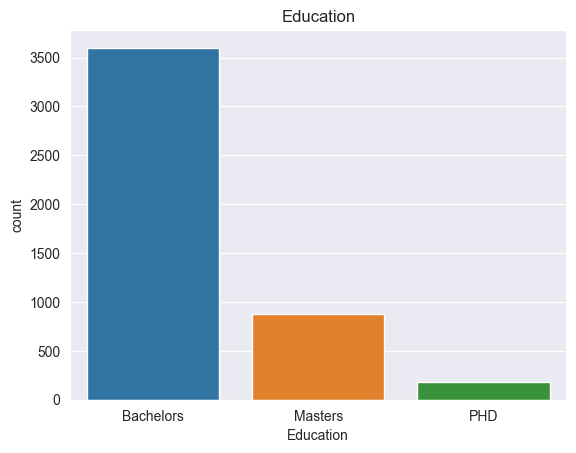

In [5]:
# create a function to plot categorical variables
def plot_cat(data, cat_var):
    sns.set_style('darkgrid')
    sns.countplot(data=data, x=cat_var)
    plt.title(cat_var)
    plt.show()

# test: Education
plot_cat(data, 'Education')

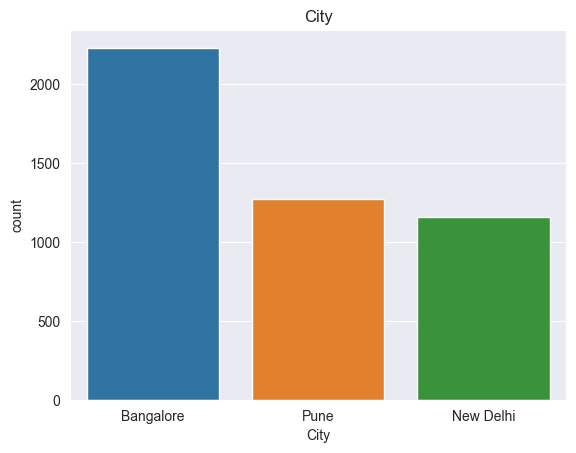

In [6]:
plot_cat(data, 'City')

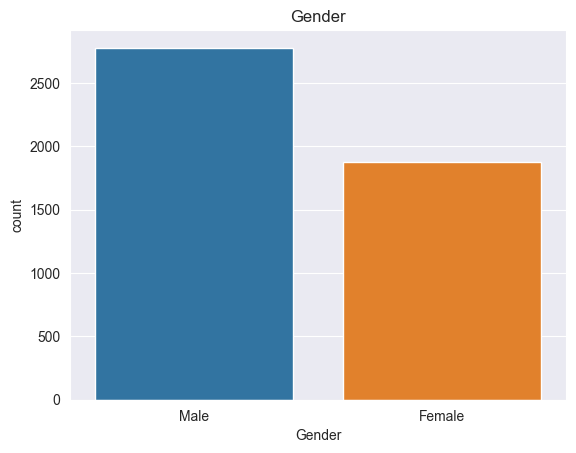

In [8]:
plot_cat(data, 'Gender')

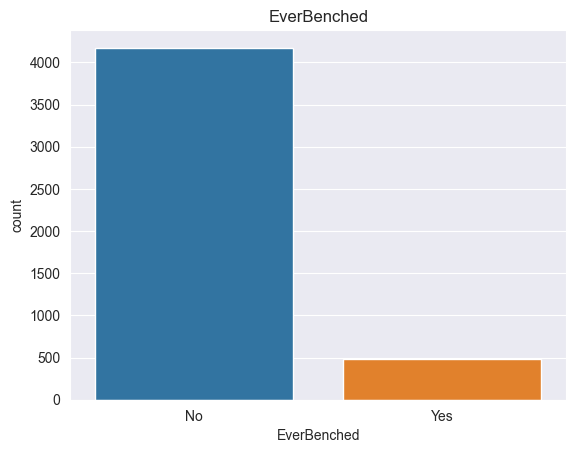

In [9]:
plot_cat(data, 'EverBenched')

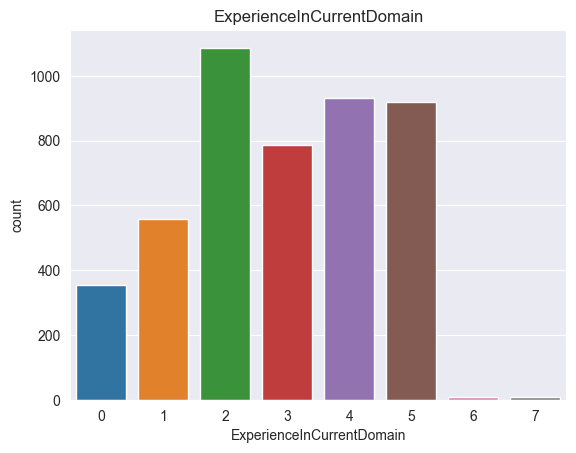

In [10]:
plot_cat(data, 'ExperienceInCurrentDomain')

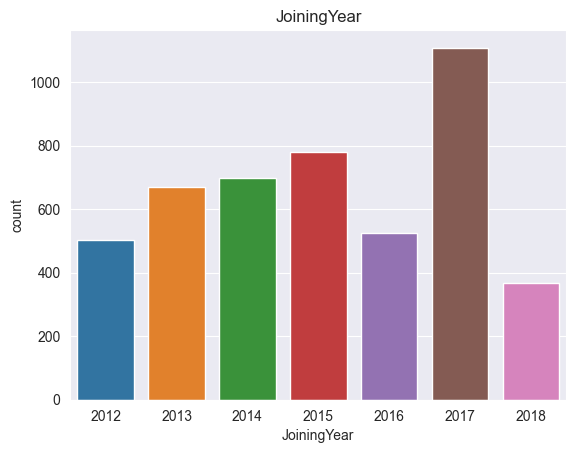

In [11]:
plot_cat(data, 'JoiningYear')

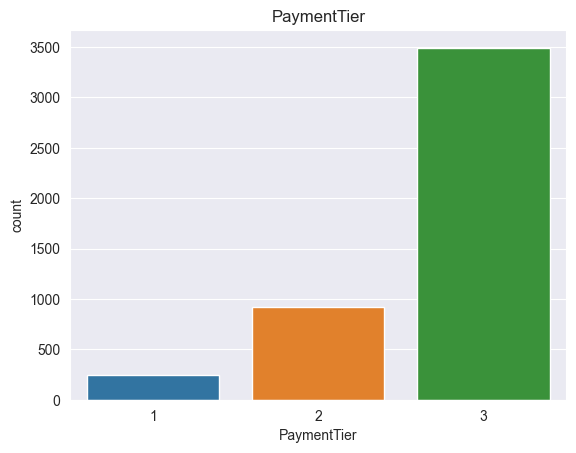

In [12]:
plot_cat(data, 'PaymentTier') 

In [14]:
# use ordinal encoding to convert categorical variables to numerical
from sklearn.preprocessing import OrdinalEncoder

# create a function to encode categorical variables
def encode_cat(data, cat_var):
    encoder = OrdinalEncoder()
    data[cat_var] = encoder.fit_transform(data[[cat_var]])
    return data

# for loop to encode all categorical variables
for i in data.columns:
    if data[i].dtypes == 'object':
        encode_cat(data, i)

# check data
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017,0.0,3,34,1.0,0.0,0,0
1,0.0,2013,2.0,1,28,0.0,0.0,3,1
2,0.0,2014,1.0,3,38,0.0,0.0,2,0
3,1.0,2016,0.0,3,27,1.0,0.0,5,1
4,1.0,2017,2.0,3,24,1.0,1.0,2,1


In [18]:
# Create our target and features
X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot']

# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [19]:
# fit a random forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# get the classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       775
           1       0.82      0.72      0.77       389

    accuracy                           0.85      1164
   macro avg       0.84      0.82      0.83      1164
weighted avg       0.85      0.85      0.85      1164



In [20]:
# extract my model as a pickle file
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [21]:
# make predictions using the first row of the test data set
print(model.predict(X_test.iloc[[0]]))

[0]
